In [6]:
import os

import torch
import torchvision.datasets as datasets
import torchvision.transforms as transforms
from torch.utils.data import DataLoader, Dataset
from tqdm import tqdm

from PIL import Image
import numpy as np
import albumentations as A
from albumentations.pytorch import ToTensorV2

ModuleNotFoundError: No module named 'torchvision'

In [5]:
train_dir = './data/train_loader'
test_dir = './data/test_loader'

normalize = A.Normalize((0.5071, 0.4865, 0.4409), (0.2673, 0.2564, 0.2761))

transform_train = A.Compose([
    A.SmallestMaxSize(224),
    A.ShiftScaleRotate(shift_limit=0.05, scale_limit=0.05, rotate_limit=10),
    A.RGBShift(r_shift_limit=15, g_shift_limit=15, b_shift_limit=15),
    A.RandomBrightnessContrast(p=1),
    normalize,
    ToTensorV2(),
])

transform_albumentations = A.Compose([
    A.ShiftScaleRotate(shift_limit=0.05, scale_limit=0.05, rotate_limit=10),
    A.OneOf([
        A.HorizontalFlip(p=1),
        A.RandomRotate90(p=1),
        A.VerticalFlip(p=1)
    ], p=0.5),
    A.OneOf([
        A.RGBShift(r_shift_limit=15, g_shift_limit=15, b_shift_limit=15,p=1),
        A.RandomBrightnessContrast(p=1),
    ], p=1),
    normalize,
    ToTensorV2(),
])

transform_test = transforms.Compose([
    transforms.ToTensor(),
    normalize
])

NameError: name 'A' is not defined

In [4]:
train_dataset = datasets.CIFAR100('./data', train=True, download=True, transform=None)

Files already downloaded and verified


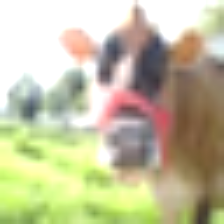

In [304]:
image, label = train_dataset[0]

# image.show()

trans = transform_train(image=np.asarray(image))

trans_image = Image.fromarray(np.uint8(trans['image']))

trans_image

In [8]:
from model.pyramidnet import PyramidNet
from bsconv.replacers import BSConvS_Replacer

model = PyramidNet(depth=32, alpha=295, bottleneck=True)

p_frac = [1, 4]
p = p_frac[0] / p_frac[1]
replacer = BSConvS_Replacer(p=p, with_bn=True)
model = replacer.apply(model)

model.to('cuda')

print(f"model parameter : {sum(p.numel() for p in model.parameters() if p.requires_grad)}")

model parameter : 2984646
